<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.


Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [ ]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl size=1192335 sha256=32c0201bde307197d8805941c45912e4d01137a5f79e7d0e64a94d3a27f80fc8
  Stored in directory: /root/.cache/pip/wheels/8b/6d/9c/e1793e5a2d85b89b8c362a4f0e3def54b786bcd14923b9ff00
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.
langchain 0.3.12 require

### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [ ]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [ ]:
%load_ext sql

In [ ]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
!pip install -q pandas

In [ ]:
%sql sqlite:///my_data1.db

In [ ]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

**Note:This below code is added to remove blank rows from table**


In [ ]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [ ]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [ ]:
# Execute the SQL query to display the names of the unique launch sites
# Change the table name in the query from 'spacex' to 'SPACEXTABLE'
query = 'SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE'
unique_launch_sites = pd.read_sql_query(query, con)

# Display the result
print(unique_launch_sites)

    Launch_Site
0   CCAFS LC-40
1   VAFB SLC-4E
2    KSC LC-39A
3  CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA'


In [ ]:
# Execute the SQL query to display 5 records where launch sites begin with the string 'CCA'
query = 'SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE "CCA%" LIMIT 5'
records_with_CCA = pd.read_sql_query(query, con)

# Display the result
print(records_with_CCA)

         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  PAYLOAD_MASS__KG_  \
0               Dragon Spacecraft Qualification Unit                  0   
1  Dragon demo flight C1, two CubeSats, barrel of...                  0   
2                              Dragon demo flight C2                525   
3                                       SpaceX CRS-1                500   
4                                       SpaceX CRS-2                677   

       Orbit         Customer Mission_Outcome      Landing_Outcome  
0        LEO           SpaceX         Success  Failure (parachute)  
1  LEO (ISS)  NASA (COTS) NRO         Success  Failure (parachute)  

### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [ ]:
# Execute the SQL query to display the total payload mass carried by boosters launched by NASA (CRS)
query = 'SELECT SUM("PAYLOAD_MASS__KG_") as Total_Payload_Mass FROM SPACEXTABLE WHERE "Customer" LIKE "%NASA (CRS)%"'
total_payload_mass = pd.read_sql_query(query, con)

# Display the result
total_payload_mass

,Total_Payload_Mass
0,48213


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [ ]:
# Execute the SQL query to display the average payload mass carried by booster version F9 v1.1
query = 'SELECT AVG("PAYLOAD_MASS__KG_") as Average_Payload_Mass FROM SPACEXTABLE WHERE "Booster_Version" = "F9 v1.1"'
average_payload_mass = pd.read_sql_query(query, con)

# Display the result
average_payload_mass

,Average_Payload_Mass
0,2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_


In [ ]:
# Execute the SQL query to list the date when the first successful landing outcome in ground pad was achieved
query = 'SELECT MIN(Date) as First_Successful_Landing_Date FROM SPACEXTABLE WHERE "Landing_Outcome" = "Success (ground pad)"'
first_successful_landing_date = pd.read_sql_query(query, con)

# Display the result
first_successful_landing_date

,First_Successful_Landing_Date
0,2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [ ]:
# Execute the SQL query to list the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
query = '''
SELECT "Booster_Version"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = "Success (drone ship)"
AND "PAYLOAD_MASS__KG_" > 4000
AND "PAYLOAD_MASS__KG_" < 6000
'''
boosters_with_success_drone_ship = pd.read_sql_query(query, con)

# Display the result
boosters_with_success_drone_ship

,Booster_Version
0,F9 FT B1022
1,F9 FT B1026
2,F9 FT B1021.2
3,F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [ ]:
#Execute the SQL query to list the total number of successful and failure mission outcomes
query = '''
SELECT "Mission_Outcome", COUNT(*) as Total_Count
FROM SPACEXTABLE
GROUP BY "Mission_Outcome"
'''
mission_outcomes = pd.read_sql_query(query, con)

# Display the result
mission_outcomes

,Mission_Outcome,Total_Count
0,Failure (in flight),1
1,Success,98
2,Success,1
3,Success (payload status unclear),1


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [ ]:
# Execute the SQL query to list the names of the booster_versions which have carried the maximum payload mass using a subquery
query = '''
SELECT "Booster_Version"
FROM SPACEXTABLE
WHERE "PAYLOAD_MASS__KG_" = (
    SELECT MAX("PAYLOAD_MASS__KG_")
    FROM SPACEXTABLE
)
'''
booster_versions_max_payload = pd.read_sql_query(query, con)

# Display the result
booster_versions_max_payload


,Booster_Version
0,F9 B5 B1048.4
1,F9 B5 B1049.4
2,F9 B5 B1051.3
3,F9 B5 B1056.4
4,F9 B5 B1048.5
5,F9 B5 B1051.4
6,F9 B5 B1049.5
7,F9 B5 B1060.2
8,F9 B5 B1058.3
9,F9 B5 B1051.6


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [ ]:
# Execute the SQL query to list the records with month names, failure landing outcomes in drone ship, booster versions, and launch site for the months in year 2015
query = '''
SELECT
    CASE
        WHEN substr(Date, 6, 2) = '01' THEN 'January'
        WHEN substr(Date, 6, 2) = '02' THEN 'February'
        WHEN substr(Date, 6, 2) = '03' THEN 'March'
        WHEN substr(Date, 6, 2) = '04' THEN 'April'
        WHEN substr(Date, 6, 2) = '05' THEN 'May'
        WHEN substr(Date, 6, 2) = '06' THEN 'June'
        WHEN substr(Date, 6, 2) = '07' THEN 'July'
        WHEN substr(Date, 6, 2) = '08' THEN 'August'
        WHEN substr(Date, 6, 2) = '09' THEN 'September'
        WHEN substr(Date, 6, 2) = '10' THEN 'October'
        WHEN substr(Date, 6, 2) = '11' THEN 'November'
        WHEN substr(Date, 6, 2) = '12' THEN 'December'
    END as Month,
    "Landing_Outcome",
    "Booster_Version",
    "Launch_Site"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = "Failure (drone ship)"
AND substr(Date, 0, 5) = '2015'
'''
failure_landing_outcomes_2015 = pd.read_sql_query(query, con)

# Display the result
failure_landing_outcomes_2015

,Month,Landing_Outcome,Booster_Version,Launch_Site
0,January,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
1,April,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [ ]:
# Execute the SQL query to rank the count of landing outcomes between the date 2010-06-04 and 2017-03-20 in descending order
query = '''
SELECT "Landing_Outcome", COUNT(*) as Count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY Count DESC
'''
landing_outcomes_ranked = pd.read_sql_query(query, con)

# Display the result
landing_outcomes_ranked

,Landing_Outcome,Count
0,No attempt,10
1,Success (drone ship),5
2,Failure (drone ship),5
3,Success (ground pad),3
4,Controlled (ocean),3
5,Uncontrolled (ocean),2
6,Failure (parachute),2
7,Precluded (drone ship),1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_excel('/content/Dataset1.xlsx')
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check the column names
print(df.columns)



   FlightNumber       Date BoosterVersion  PayloadMass Orbit       LaunchSite  \
0             1 2006-03-24       Falcon 1         20.0   LEO  Kwajalein Atoll   
1             2 2007-03-21       Falcon 1          NaN   LEO  Kwajalein Atoll   
2             4 2008-09-28       Falcon 1        165.0   LEO  Kwajalein Atoll   
3             5 2009-07-13       Falcon 1        200.0   LEO  Kwajalein Atoll   
4             6 2010-06-04       Falcon 9          NaN   LEO     CCSFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    NaN            0   
1  None None        1     False   False  False        NaN    NaN            0   
2  None None        1     False   False  False        NaN    NaN            0   
3  None None        1     False   False  False        NaN    NaN            0   
4  None None        1     False   False  False        NaN    1.0            0   

     Serial   Longitude   

In [ ]:
print(df.head())

   FlightNumber       Date BoosterVersion  PayloadMass Orbit       LaunchSite  \
0             1 2006-03-24       Falcon 1         20.0   LEO  Kwajalein Atoll   
1             2 2007-03-21       Falcon 1          NaN   LEO  Kwajalein Atoll   
2             4 2008-09-28       Falcon 1        165.0   LEO  Kwajalein Atoll   
3             5 2009-07-13       Falcon 1        200.0   LEO  Kwajalein Atoll   
4             6 2010-06-04       Falcon 9          NaN   LEO     CCSFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    NaN            0   
1  None None        1     False   False  False        NaN    NaN            0   
2  None None        1     False   False  False        NaN    NaN            0   
3  None None        1     False   False  False        NaN    NaN            0   
4  None None        1     False   False  False        NaN    1.0            0   

     Serial   Longitude   

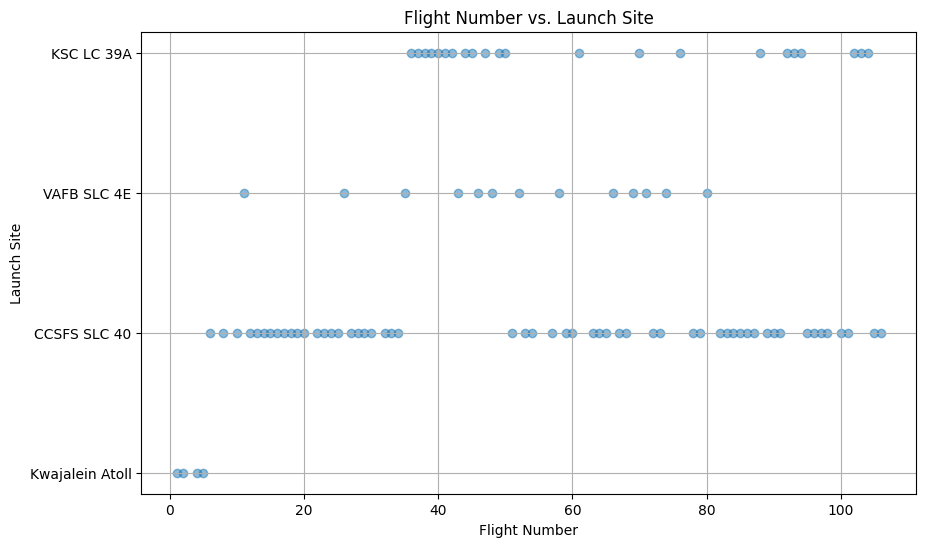

In [ ]:
# Create a scatter plot of Flight Number vs. Launch Site
# Create a scatter plot of Flight Number vs. Launch Site
# Create a scatter plot of Flight Number vs. Launch Site
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightNumber'], df['LaunchSite'], alpha=0.5)
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

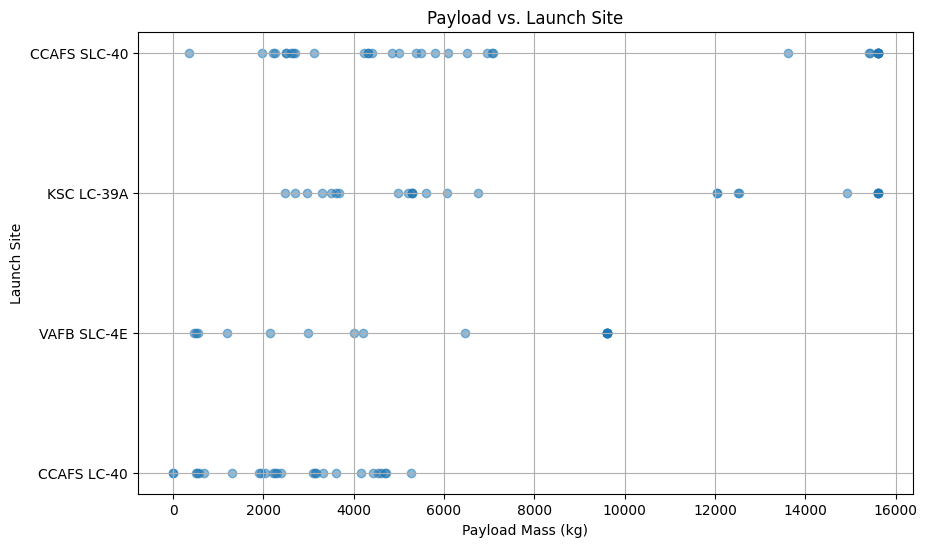

In [ ]:

# Create a scatter plot of Payload vs. Launch Site
plt.figure(figsize=(10, 6))
plt.scatter(df['PAYLOAD_MASS__KG_'], df['Launch_Site'], alpha=0.5)
plt.title('Payload vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

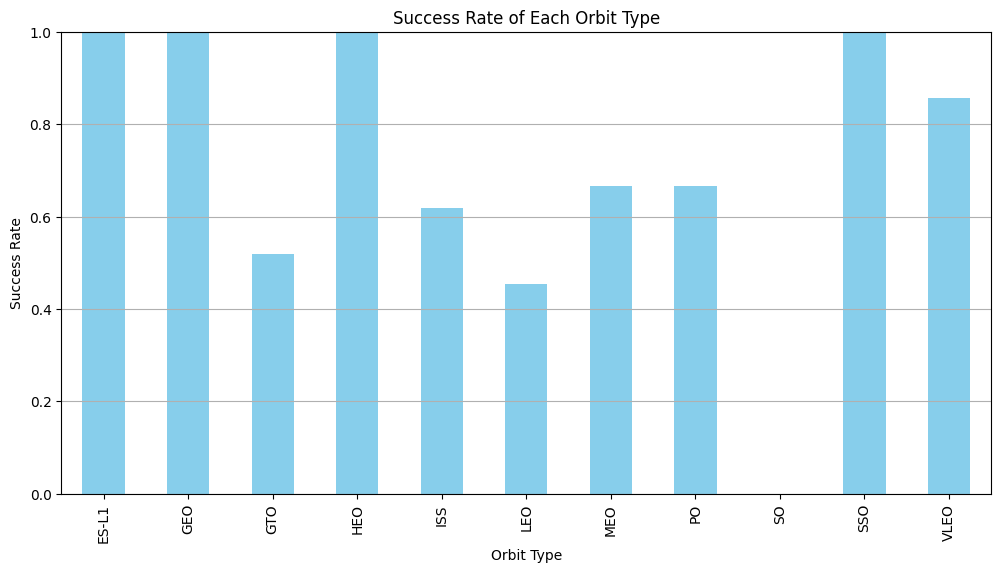

In [ ]:
# Calculate the success rate of each orbit type
df['Success'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)
orbit_success_rate = df.groupby('Orbit')['Success'].mean()

# Create a bar chart to visualize the success rates
plt.figure(figsize=(12, 6))
orbit_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

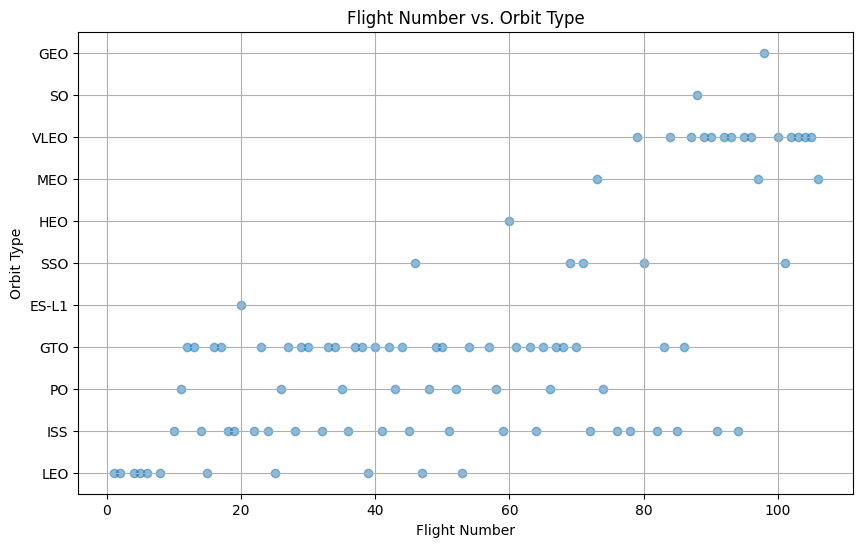

In [ ]:
# Create a scatter plot of Flight Number vs. Orbit Type
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightNumber'], df['Orbit'], alpha=0.5)
plt.title('Flight Number vs. Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.show()

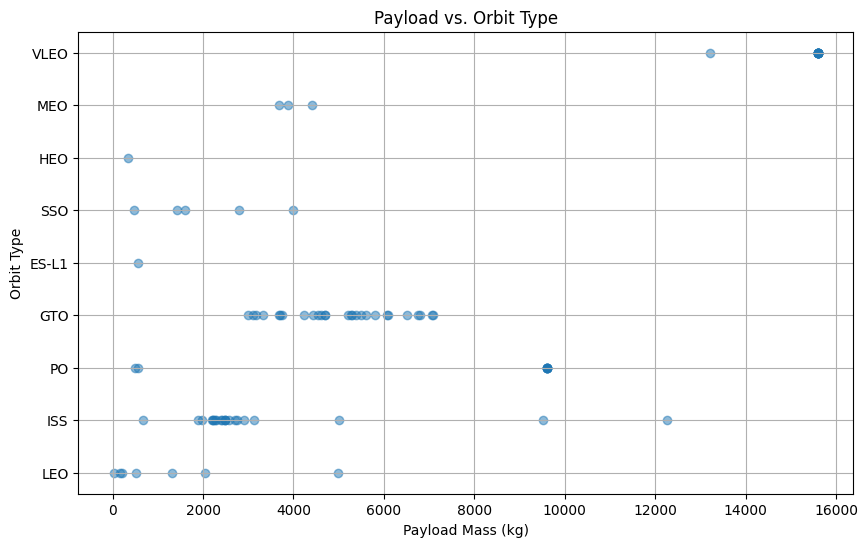

In [ ]:
# Create a scatter plot of Payload vs. Orbit Type
plt.figure(figsize=(10, 6))
plt.scatter(df['PayloadMass'], df['Orbit'], alpha=0.5)
plt.title('Payload vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.show()

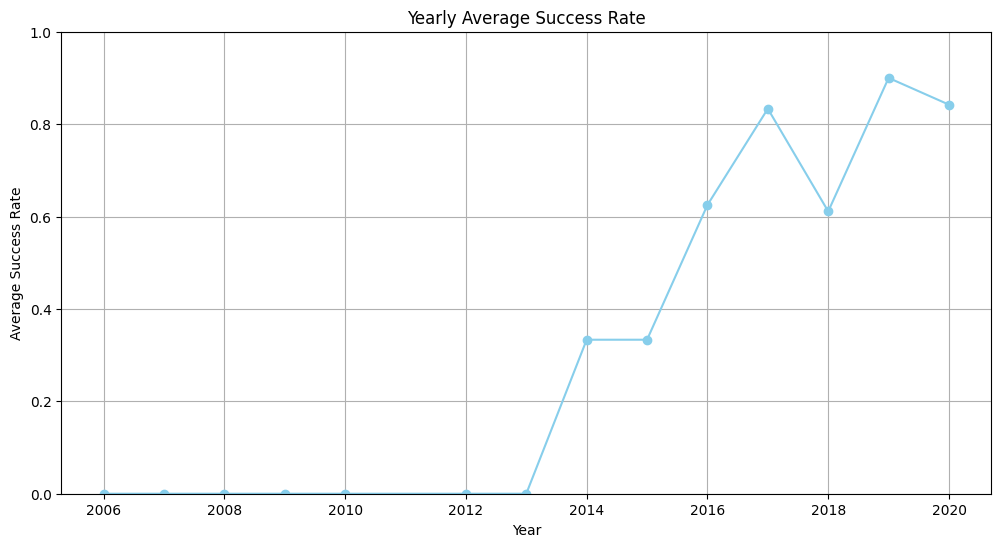

In [ ]:
# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate for each year
df['Success'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)
yearly_success_rate = df.groupby('Year')['Success'].mean()

# Create a line chart to visualize the yearly average success rate
plt.figure(figsize=(12, 6))
yearly_success_rate.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Average Success Rate')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


<!--
## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |
-->


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
